(4096, 1024)


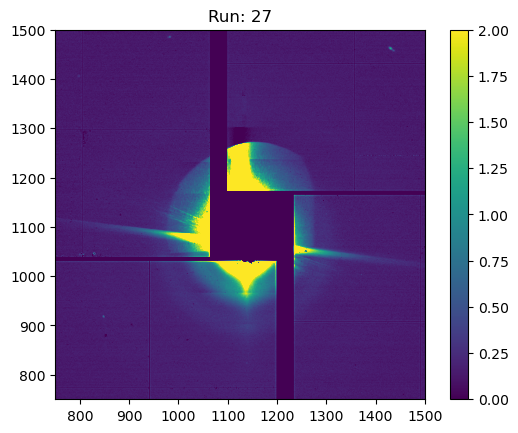

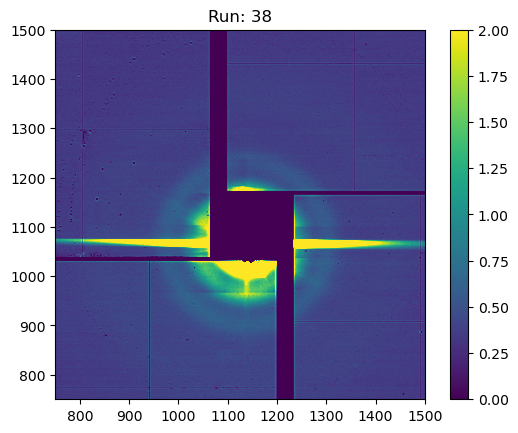

In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from constants import *
import psana


run = 27


with h5py.File(f'{MASK_FILE}') as maskh5:
    mask = maskh5['/data/data'][:]

mask = mask.reshape((DET_SHAPE))



ds = psana.DataSource(f'exp={EXP_NAME}:run={run}:smd')
det = psana.Detector(DET_NAME)

with h5py.File(f'{H5_FOLDER}/r{run}.h5', 'r') as f:
    run_mean = f['/run_mean'][:]
    run_intens = f['/run_intens'][:]
    pixel_hist = f['/pixel_hist_le30'][:]
    pixel_hist_bins = f['/pixel_hist_bins_le30'][:-1]

for evt in ds.events():
    break


assem_run_mean = det.image(evt, run_mean)
#assem_run_sigma = det.image(evt, run_sigma)

plt.figure()
plt.title(f'Run: {run}')
plt.imshow(assem_run_mean, vmin=0, vmax=2)
plt.xlim([750, 1500])
plt.ylim([750, 1500])
plt.colorbar()

#plt.figure()
#plt.plot(run_intens)


run = 38


ds = psana.DataSource(f'exp={EXP_NAME}:run={run}:smd')
det = psana.Detector(DET_NAME)

with h5py.File(f'{H5_FOLDER}/r{run}.h5') as f:
    run_mean = f['/run_mean'][:]
    run_intens = f['/run_intens'][:]
    pixel_hist = f['/pixel_hist_le30'][:]
    pixel_hist_bins = f['/pixel_hist_bins_le30'][:-1]

for evt in ds.events():
    break


assem_run_mean = det.image(evt, run_mean)
#assem_run_sigma = det.image(evt, run_sigma)

plt.figure()
plt.title(f'Run: {run}')
plt.imshow(assem_run_mean, vmin=0, vmax=2)
plt.xlim([750, 1500])
plt.ylim([750, 1500])
plt.colorbar()
#plt.figure()
#plt.plot(run_intens)


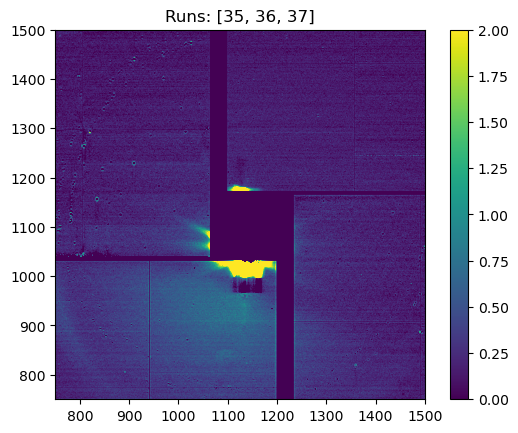

In [10]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from constants import *
import psana

with h5py.File(f'{MASK_FILE}') as maskh5:
    mask = maskh5['/data/data'][:]

mask = mask.reshape((DET_SHAPE))



runs = [35, 36, 37]


total_mean= np.zeros(ASSEM_SHAPE)

for run in runs:
    ds = psana.DataSource(f'exp={EXP_NAME}:run={run}:smd')
    det = psana.Detector(DET_NAME)
    
    with h5py.File(f'{H5_FOLDER}/r{run}.h5', 'r') as f:
        run_mean = f['/run_mean'][:]
        run_intens = f['/run_intens'][:]
    
    for evt in ds.events():
        break
    
    
    assem_run_mean = det.image(evt, run_mean)
    total_mean += assem_run_mean



plt.figure()
plt.title(f'Runs: {runs}')
plt.imshow(total_mean, vmin=0, vmax=2)
plt.xlim([750, 1500])
plt.ylim([750, 1500])
plt.colorbar()